# Analyzing S & P robot data

## Import libraries

In [6]:
import os, os.path

In [7]:
from skimage import io,util

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime

In [9]:
data_file =  "dox_selection_3_20221019_pyphe_output.csv"

In [10]:
data_df = pd.read_csv(data_file,index_col=0)

In [11]:
data_df2 = data_df.drop(columns=['centroid','mean_intensity','perimeter','circularity','RA_well'])

In [12]:
data_df2.head()

,area,row,column,plate_number,spot_well
1,2577,1,21,d000266_300_010_22-10-15_23-10-04,A21
2,2150,1,10,d000266_300_010_22-10-15_23-10-04,A10
3,2248,1,7,d000266_300_010_22-10-15_23-10-04,A7
4,2055,1,9,d000266_300_010_22-10-15_23-10-04,A9
5,2073,1,12,d000266_300_010_22-10-15_23-10-04,A12


In [13]:
data_df2[['Experiment_ID','Image_Batch', 'Plate_ID','Date','Time']] = data_df2['plate_number'].str.split('_', 4, expand=True)
data_df2.head()

,area,row,column,plate_number,spot_well,Experiment_ID,Image_Batch,Plate_ID,Date,Time
1,2577,1,21,d000266_300_010_22-10-15_23-10-04,A21,d000266,300,010,22-10-15,23-10-04
2,2150,1,10,d000266_300_010_22-10-15_23-10-04,A10,d000266,300,010,22-10-15,23-10-04
3,2248,1,7,d000266_300_010_22-10-15_23-10-04,A7,d000266,300,010,22-10-15,23-10-04
4,2055,1,9,d000266_300_010_22-10-15_23-10-04,A9,d000266,300,010,22-10-15,23-10-04
5,2073,1,12,d000266_300_010_22-10-15_23-10-04,A12,d000266,300,010,22-10-15,23-10-04


In [14]:
#dox_sel2 = data_df2[data_df2.Experiment_ID=="d000265"]
#dox_sel3 = data_df2[data_df2.Experiment_ID=="d000266"]

In [15]:
data_df3 = data_df2.drop(columns=['plate_number','Image_Batch'])

In [16]:
data_df3['Date'] = '20' + data_df3['Date'].astype(str)

In [17]:
cols = ['Date', 'Time']
data_df3['Date_Time'] =  data_df3[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
data_df3.head()

,area,row,column,spot_well,Experiment_ID,Plate_ID,Date,Time,Date_Time
1,2577,1,21,A21,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04
2,2150,1,10,A10,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04
3,2248,1,7,A7,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04
4,2055,1,9,A9,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04
5,2073,1,12,A12,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04


In [18]:
data_df3['TimeFormat'] =  pd.to_datetime(data_df3['Date_Time'], format='%Y-%m-%d_%H-%M-%S')

In [19]:
data_df3.head()

,area,row,column,spot_well,Experiment_ID,Plate_ID,Date,Time,Date_Time,TimeFormat
1,2577,1,21,A21,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04,2022-10-15 23:10:04
2,2150,1,10,A10,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04,2022-10-15 23:10:04
3,2248,1,7,A7,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04,2022-10-15 23:10:04
4,2055,1,9,A9,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04,2022-10-15 23:10:04
5,2073,1,12,A12,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04,2022-10-15 23:10:04


In [20]:
cols = ['Experiment_ID','Plate_ID', 'spot_well']
data_df3['Sample_ID'] =  data_df3[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
data_df3.head()

,area,row,column,spot_well,Experiment_ID,Plate_ID,Date,Time,Date_Time,TimeFormat,Sample_ID,Selection
1,2577,1,21,A21,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04,2022-10-15 23:10:04,010_A21,Sel_3
2,2150,1,10,A10,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04,2022-10-15 23:10:04,010_A10,Sel_3
3,2248,1,7,A7,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04,2022-10-15 23:10:04,010_A7,Sel_3
4,2055,1,9,A9,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04,2022-10-15 23:10:04,010_A9,Sel_3
5,2073,1,12,A12,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04,2022-10-15 23:10:04,010_A12,Sel_3


In [21]:
experiment_dict = {"d000265":"Sel_2","d000266":"Sel_3"}
data_df3['Selection'] = data_df3['Experiment_ID'].map(experiment_dict)

In [22]:
data_df3.head()

,area,row,column,spot_well,Experiment_ID,Plate_ID,Date,Time,Date_Time,TimeFormat,Sample_ID,Selection
1,2577,1,21,A21,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04,2022-10-15 23:10:04,010_A21,Sel_3
2,2150,1,10,A10,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04,2022-10-15 23:10:04,010_A10,Sel_3
3,2248,1,7,A7,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04,2022-10-15 23:10:04,010_A7,Sel_3
4,2055,1,9,A9,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04,2022-10-15 23:10:04,010_A9,Sel_3
5,2073,1,12,A12,d000266,010,2022-10-15,23-10-04,2022-10-15_23-10-04,2022-10-15 23:10:04,010_A12,Sel_3


In [23]:
data_df4 = data_df3.drop(columns=['Date','Time','Date_Time','Experiment_ID'])

In [24]:
data_df4.groupby("Sample_ID")["TimeFormat"].transform(min)

1      2022-10-13 11:11:47
2      2022-10-13 11:11:47
3      2022-10-13 11:11:47
4      2022-10-13 11:11:47
5      2022-10-13 11:11:47
               ...        
1531   2022-10-13 19:18:29
1532   2022-10-13 19:18:29
1533   2022-10-13 23:18:33
1534   2022-10-13 17:18:31
1535   2022-10-13 19:18:29
Name: TimeFormat, Length: 1833290, dtype: datetime64[ns]

In [25]:
data_df4["Time_incubation"] = data_df4["TimeFormat"]
data_df4["Time_incubation"] -= data_df4.groupby("Sample_ID")["TimeFormat"].transform(min)

In [26]:
data_df4.head()

,area,row,column,spot_well,Plate_ID,TimeFormat,Sample_ID,Selection,Time_incubation
1,2577,1,21,A21,010,2022-10-15 23:10:04,010_A21,Sel_3,2 days 11:58:17
2,2150,1,10,A10,010,2022-10-15 23:10:04,010_A10,Sel_3,2 days 11:58:17
3,2248,1,7,A7,010,2022-10-15 23:10:04,010_A7,Sel_3,2 days 11:58:17
4,2055,1,9,A9,010,2022-10-15 23:10:04,010_A9,Sel_3,2 days 11:58:17
5,2073,1,12,A12,010,2022-10-15 23:10:04,010_A12,Sel_3,2 days 11:58:17


In [27]:
#data_df4['Hour_incubation'] = round(data_df4['Time_incubation'].total_seconds() / 3600)
data_df4['Hour_incubation'] =  data_df4['Time_incubation']/ pd.Timedelta(hours=1)

data_df4.head()

,area,row,column,spot_well,Plate_ID,TimeFormat,Sample_ID,Selection,Time_incubation,Hour_incubation
1,2577,1,21,A21,010,2022-10-15 23:10:04,010_A21,Sel_3,2 days 11:58:17,59.971389
2,2150,1,10,A10,010,2022-10-15 23:10:04,010_A10,Sel_3,2 days 11:58:17,59.971389
3,2248,1,7,A7,010,2022-10-15 23:10:04,010_A7,Sel_3,2 days 11:58:17,59.971389
4,2055,1,9,A9,010,2022-10-15 23:10:04,010_A9,Sel_3,2 days 11:58:17,59.971389
5,2073,1,12,A12,010,2022-10-15 23:10:04,010_A12,Sel_3,2 days 11:58:17,59.971389


In [28]:
test_data = data_df4[data_df4.Plate_ID=="010"]
test_data2 = test_data[test_data.row==1]

In [29]:
#test_data2[test_data2.index.duplicated()]
test_data2.reset_index(level=0, inplace=True)
test_data2.head()

,index,area,row,column,spot_well,Plate_ID,TimeFormat,Sample_ID,Selection,Time_incubation,Hour_incubation
0,431,2225,10,1,J1,026,2022-10-14 17:22:23,026_J1,Sel_2,1 days 05:59:23,29.989722
1,432,2507,10,3,J3,026,2022-10-14 17:22:23,026_J3,Sel_2,1 days 05:59:23,29.989722
2,433,1955,10,2,J2,026,2022-10-14 17:22:23,026_J2,Sel_2,1 days 05:59:23,29.989722
3,434,2120,10,11,J11,026,2022-10-14 17:22:23,026_J11,Sel_2,1 days 05:59:23,29.989722
4,435,2298,10,6,J6,026,2022-10-14 17:22:23,026_J6,Sel_2,1 days 05:59:23,29.989722


<AxesSubplot:xlabel='Hour_incubation', ylabel='area'>

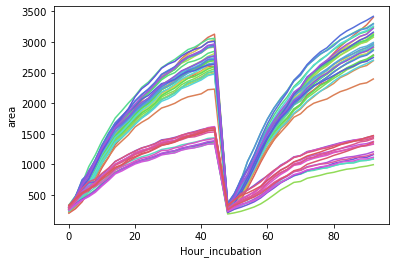

In [30]:
data = test_data2
sns.lineplot(data=test_data2,x='Hour_incubation', y='area', legend=False, hue='Sample_ID', palette='hls')


In [75]:
def get_auc(g):
    return np.trapz(g.area)

aucdf = data_df4.groupby(['Selection','Plate_ID','spot_well'])[['area']].apply(func=get_auc).reset_index(name='auc')
full_df = data_df4.merge(right=aucdf, on=['Selection','Plate_ID','spot_well'])

full_df.head()


,area,row,column,spot_well,Plate_ID,TimeFormat,Sample_ID,Selection,Time_incubation,Hour_incubation,auc
0,2577,1,21,A21,010,2022-10-15 23:10:04,d000266_010_A21,Sel_3,0 days 11:59:31,11.991944,62262.0
1,3293,1,21,A21,010,2022-10-16 13:10:03,d000266_010_A21,Sel_3,1 days 01:59:30,25.991667,62262.0
2,3479,1,21,A21,010,2022-10-17 01:10:05,d000266_010_A21,Sel_3,1 days 13:59:32,37.992222,62262.0
3,3152,1,21,A21,010,2022-10-16 09:10:10,d000266_010_A21,Sel_3,0 days 21:59:37,21.993611,62262.0
4,3240,1,21,A21,010,2022-10-16 11:10:07,d000266_010_A21,Sel_3,0 days 23:59:34,23.992778,62262.0


In [76]:
data_auc = full_df.drop(columns=['Sample_ID','Time_incubation','Hour_incubation','TimeFormat','area'])

In [77]:
data_auc.head()

,row,column,spot_well,Plate_ID,Selection,auc
0,1,21,A21,010,Sel_3,62262.0
1,1,21,A21,010,Sel_3,62262.0
2,1,21,A21,010,Sel_3,62262.0
3,1,21,A21,010,Sel_3,62262.0
4,1,21,A21,010,Sel_3,62262.0


In [78]:
len(data_auc)

1833290

In [79]:
data_auc_unique = data_auc.drop_duplicates()

In [80]:
len(data_auc_unique)

79841

In [81]:
data_auc_unique.to_csv("2022-11-08_Dox_AUC_data.csv",index=None)